# ANN(PyTorch) - Iris flower dataset
* Project: To classify Iris flowers
* Project Scope: Create, train and validate Neural Network on Iris flower dataset
* Data source: [Iris Data Set to download](https://archive.ics.uci.edu/ml/datasets/iris)
* About data: The dataset contains 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica) of 50 instances each, where each class refers to a type of iris plant. 
* Author: Shashi Kiran Chilukuri

## Import Packages and Load data

In [1]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch Packages
import torch
import torch.nn as nn

# Import get_data, Netwrok classes
import Iris_model
import data

# Load data
dataset = pd.read_csv('iris.data.csv')

## Lets analyze and visualize data 

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     150 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


* We can see there are 5 Columns and its datatypes:
* Out of 5 columns, 4 are input variables/features (X), 1 output /target variable (y) 
* There are 150 rows/training examples (m)

In [3]:
dataset.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can notice, we have numeric data in our inputs and flower name in the class column. We need to convert this class column so that our neural network can understand. But before that lets analyze further

In [4]:
# Checking for null columns
dataset.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

We dont have any null data in our dataset

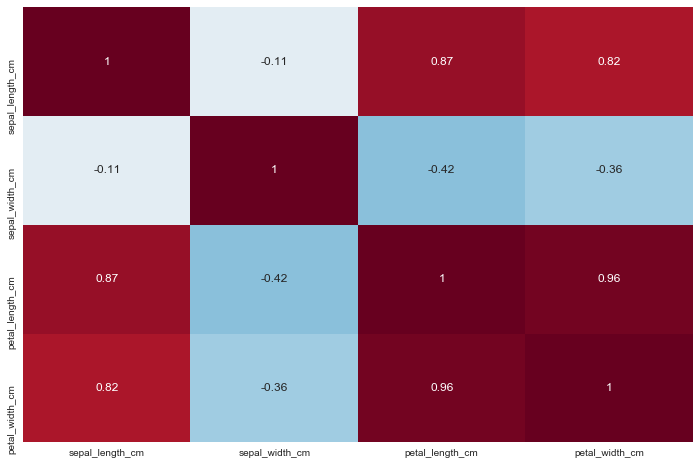

In [5]:
#Correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,cbar=False)
plt.show()

In [6]:
dataset['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

We can notice there are 3 iris flower types and each one got 50 instances

## Create train and test loader

In [7]:
# Creating train and test loader
train_loader = torch.utils.data.DataLoader(data.get_data('iris.data.csv','train'), 
                                           batch_size=60, shuffle=True)
test_loader  = torch.utils.data.DataLoader(data.get_data('iris.data.csv', ' '), 
                                           batch_size=60, shuffle=True)

## Creating the model, loss function and optimizer

In [8]:
##### Creating instance of the model #####
model = Iris_model.Network(4, 3, [100,50])
##### Loss Function #######################
criterion = nn.CrossEntropyLoss()
##### Optimizer ###########################
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, nesterov=True, momentum=0.9, dampening=0)

In [9]:
Iris_model.train(model, train_loader, test_loader, criterion, optimizer, epochs=500)

Epoch: 1/500..  Train Loss: 1.972..  Test Loss: 1.186..  Test Accuracy: 30.000
Epoch: 2/500..  Train Loss: 2.135..  Test Loss: 1.148..  Test Accuracy: 30.000
Epoch: 3/500..  Train Loss: 2.130..  Test Loss: 1.113..  Test Accuracy: 46.667
Epoch: 4/500..  Train Loss: 2.068..  Test Loss: 1.085..  Test Accuracy: 30.000
Epoch: 5/500..  Train Loss: 1.990..  Test Loss: 1.062..  Test Accuracy: 30.000
Epoch: 6/500..  Train Loss: 2.005..  Test Loss: 1.043..  Test Accuracy: 30.000
Epoch: 7/500..  Train Loss: 1.947..  Test Loss: 1.026..  Test Accuracy: 30.000
Epoch: 8/500..  Train Loss: 2.008..  Test Loss: 1.011..  Test Accuracy: 30.000
Epoch: 9/500..  Train Loss: 2.015..  Test Loss: 0.998..  Test Accuracy: 30.000
Epoch: 10/500..  Train Loss: 1.987..  Test Loss: 0.986..  Test Accuracy: 33.333
Epoch: 11/500..  Train Loss: 1.929..  Test Loss: 0.974..  Test Accuracy: 60.000
Epoch: 12/500..  Train Loss: 1.901..  Test Loss: 0.964..  Test Accuracy: 70.000
Epoch: 13/500..  Train Loss: 1.946..  Test Loss: 

Epoch: 106/500..  Train Loss: 0.837..  Test Loss: 0.358..  Test Accuracy: 96.667
Epoch: 107/500..  Train Loss: 0.859..  Test Loss: 0.356..  Test Accuracy: 96.667
Epoch: 108/500..  Train Loss: 0.880..  Test Loss: 0.354..  Test Accuracy: 96.667
Epoch: 109/500..  Train Loss: 0.794..  Test Loss: 0.353..  Test Accuracy: 96.667
Epoch: 110/500..  Train Loss: 0.841..  Test Loss: 0.350..  Test Accuracy: 96.667
Epoch: 111/500..  Train Loss: 0.724..  Test Loss: 0.348..  Test Accuracy: 96.667
Epoch: 112/500..  Train Loss: 0.683..  Test Loss: 0.346..  Test Accuracy: 96.667
Epoch: 113/500..  Train Loss: 0.756..  Test Loss: 0.344..  Test Accuracy: 96.667
Epoch: 114/500..  Train Loss: 0.656..  Test Loss: 0.343..  Test Accuracy: 96.667
Epoch: 115/500..  Train Loss: 0.780..  Test Loss: 0.341..  Test Accuracy: 96.667
Epoch: 116/500..  Train Loss: 0.738..  Test Loss: 0.339..  Test Accuracy: 96.667
Epoch: 117/500..  Train Loss: 0.761..  Test Loss: 0.337..  Test Accuracy: 96.667
Epoch: 118/500..  Train Loss

Epoch: 209/500..  Train Loss: 0.481..  Test Loss: 0.195..  Test Accuracy: 100.000
Epoch: 210/500..  Train Loss: 0.390..  Test Loss: 0.194..  Test Accuracy: 100.000
Epoch: 211/500..  Train Loss: 0.404..  Test Loss: 0.193..  Test Accuracy: 100.000
Epoch: 212/500..  Train Loss: 0.366..  Test Loss: 0.192..  Test Accuracy: 100.000
Epoch: 213/500..  Train Loss: 0.431..  Test Loss: 0.191..  Test Accuracy: 100.000
Epoch: 214/500..  Train Loss: 0.427..  Test Loss: 0.190..  Test Accuracy: 100.000
Epoch: 215/500..  Train Loss: 0.405..  Test Loss: 0.190..  Test Accuracy: 100.000
Epoch: 216/500..  Train Loss: 0.428..  Test Loss: 0.188..  Test Accuracy: 100.000
Epoch: 217/500..  Train Loss: 0.346..  Test Loss: 0.187..  Test Accuracy: 100.000
Epoch: 218/500..  Train Loss: 0.331..  Test Loss: 0.186..  Test Accuracy: 100.000
Epoch: 219/500..  Train Loss: 0.342..  Test Loss: 0.186..  Test Accuracy: 100.000
Epoch: 220/500..  Train Loss: 0.417..  Test Loss: 0.185..  Test Accuracy: 100.000
Epoch: 221/500..

Epoch: 311/500..  Train Loss: 0.249..  Test Loss: 0.129..  Test Accuracy: 100.000
Epoch: 312/500..  Train Loss: 0.242..  Test Loss: 0.129..  Test Accuracy: 100.000
Epoch: 313/500..  Train Loss: 0.259..  Test Loss: 0.129..  Test Accuracy: 100.000
Epoch: 314/500..  Train Loss: 0.223..  Test Loss: 0.128..  Test Accuracy: 100.000
Epoch: 315/500..  Train Loss: 0.252..  Test Loss: 0.127..  Test Accuracy: 100.000
Epoch: 316/500..  Train Loss: 0.263..  Test Loss: 0.127..  Test Accuracy: 100.000
Epoch: 317/500..  Train Loss: 0.243..  Test Loss: 0.126..  Test Accuracy: 100.000
Epoch: 318/500..  Train Loss: 0.270..  Test Loss: 0.126..  Test Accuracy: 100.000
Epoch: 319/500..  Train Loss: 0.310..  Test Loss: 0.126..  Test Accuracy: 100.000
Epoch: 320/500..  Train Loss: 0.222..  Test Loss: 0.126..  Test Accuracy: 100.000
Epoch: 321/500..  Train Loss: 0.245..  Test Loss: 0.126..  Test Accuracy: 100.000
Epoch: 322/500..  Train Loss: 0.252..  Test Loss: 0.125..  Test Accuracy: 100.000
Epoch: 323/500..

Epoch: 411/500..  Train Loss: 0.168..  Test Loss: 0.104..  Test Accuracy: 100.000
Epoch: 412/500..  Train Loss: 0.256..  Test Loss: 0.104..  Test Accuracy: 100.000
Epoch: 413/500..  Train Loss: 0.205..  Test Loss: 0.103..  Test Accuracy: 100.000
Epoch: 414/500..  Train Loss: 0.223..  Test Loss: 0.103..  Test Accuracy: 100.000
Epoch: 415/500..  Train Loss: 0.138..  Test Loss: 0.103..  Test Accuracy: 100.000
Epoch: 416/500..  Train Loss: 0.231..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 417/500..  Train Loss: 0.146..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 418/500..  Train Loss: 0.137..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 419/500..  Train Loss: 0.245..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 420/500..  Train Loss: 0.207..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 421/500..  Train Loss: 0.207..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 422/500..  Train Loss: 0.131..  Test Loss: 0.102..  Test Accuracy: 100.000
Epoch: 423/500..

In [11]:
torch.save(model.state_dict(), "Iris_model_state_dict.pth")

In [12]:
model = Iris_model.Network(4, 3, [100,50])
model.load_state_dict(torch.load("Iris_model_state_dict.pth"))